<h1>Estudo de Incerteza pelo Método de Monte Carlo</h1>

In [1]:
import numpy as np
from scipy.stats import norm, kurtosis, skew
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = 12.8, 9.6

<hr>
<h2>Dados obtidos das RQPS's</h2>

In [2]:
data = {
    'corrente': np.array([141.0, 135.0, 130.0, 129.0, 118.0, 137.5, 160.0, 112.5, 115.0, 151.0]),
    'v_soldagem': np.array([120.0, 122.1, 158.3, 149.5, 139.4, 205.0, 100.0, 135.0, 132.0, 110.0]),
    'v_aliment': np.array([3.0, 3.0, 3.0, 3.0, 2.7, 3.7, 3.8, 2.5, 2.7, 2.9])
}

dadosInput = pd.DataFrame(data, columns=['corrente', 'v_soldagem', 'v_aliment'])
print(dadosInput)
print('\n')
estatBasica = pd.DataFrame([[dadosInput['corrente'].mean(), dadosInput['corrente'].std(ddof=1)], [dadosInput['v_soldagem'].mean(), dadosInput['v_soldagem'].std(ddof=1)], [dadosInput['v_aliment'].mean(), dadosInput['v_aliment'].std(ddof=1)]], columns=['Média', 'Desvio-padrão'], index=['Corrente', 'Velocidade de Soldagem', 'Velocidade de Alimentação'])
print(estatBasica)

mediaC = estatBasica['Média']['Corrente']
mediaVs = estatBasica['Média']['Velocidade de Soldagem']
mediaVa = estatBasica['Média']['Velocidade de Alimentação']

   corrente  v_soldagem  v_aliment
0     141.0       120.0        3.0
1     135.0       122.1        3.0
2     130.0       158.3        3.0
3     129.0       149.5        3.0
4     118.0       139.4        2.7
5     137.5       205.0        3.7
6     160.0       100.0        3.8
7     112.5       135.0        2.5
8     115.0       132.0        2.7
9     151.0       110.0        2.9


                            Média  Desvio-padrão
Corrente                   132.90      15.403463
Velocidade de Soldagem     137.13      29.585171
Velocidade de Alimentação    3.03       0.416467


<hr>
<h2>Visualização dos dados por gráfico tipo boxplot</h2>

<h3>Corrente</h3>

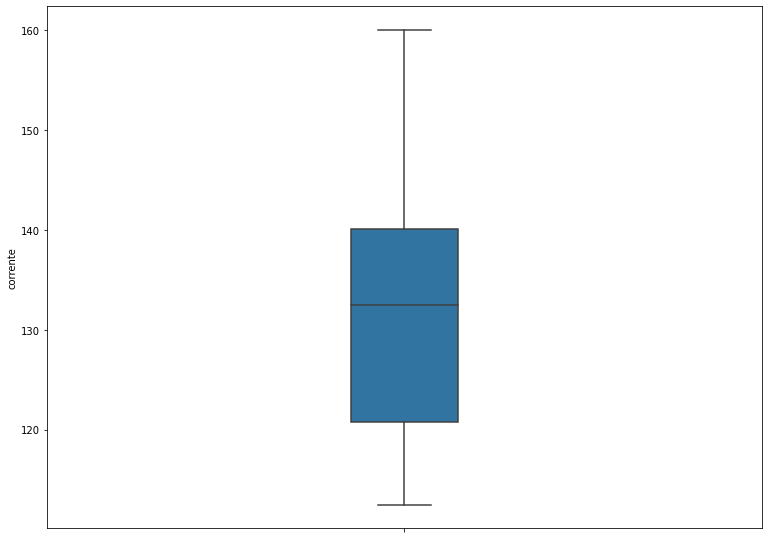

In [3]:
boxplotC = sns.boxplot(y=dadosInput['corrente'], data=dadosInput['corrente'], width=0.15)

# Identificação de outliers
q3C = dadosInput['corrente'].quantile(0.75)
q1C = dadosInput['corrente'].quantile(0.25)

outSupC = q3C + (1.5*(q3C - q1C))
outInfC = q1C - (1.5*(q3C - q1C))

for item in dadosInput['corrente']:
    if item < outInfC or item > outSupC:
        plt.text(x=0, y=item, s=f'  {item}', ha='left', va='center')

plt.show()

<h3>Velocidade de Soldagem</h3>

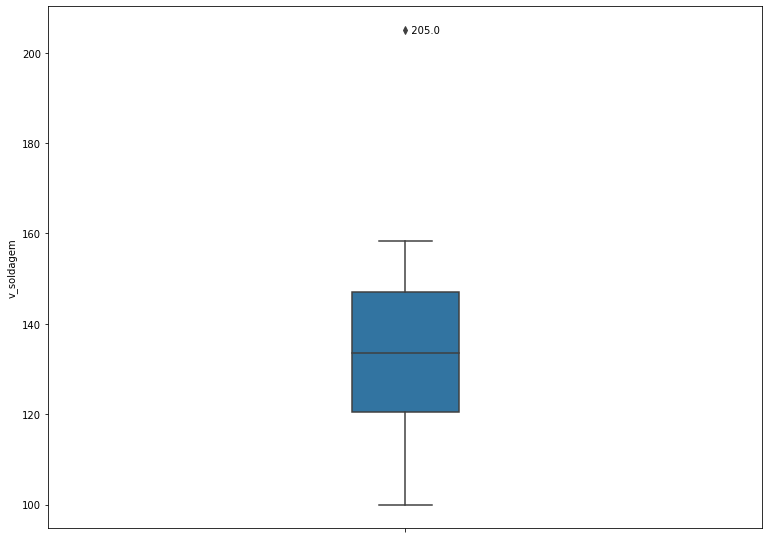

In [4]:
boxplotVs = sns.boxplot(y=dadosInput['v_soldagem'], data=dadosInput['v_soldagem'], width=0.15)

# Identificação de outliers
q3Vs = dadosInput['v_soldagem'].quantile(0.75)
q1Vs = dadosInput['v_soldagem'].quantile(0.25)

outSupVs = q3Vs + (1.5*(q3Vs - q1Vs))
outInfVs = q1Vs - (1.5*(q3Vs - q1Vs))

for item in dadosInput['v_soldagem']:
    if item < outInfVs or item > outSupVs:
        plt.text(x=0, y=item, s=f'  {item}', ha='left', va='center')

plt.show()

<h3>Velocidade de Alimentação</h3>

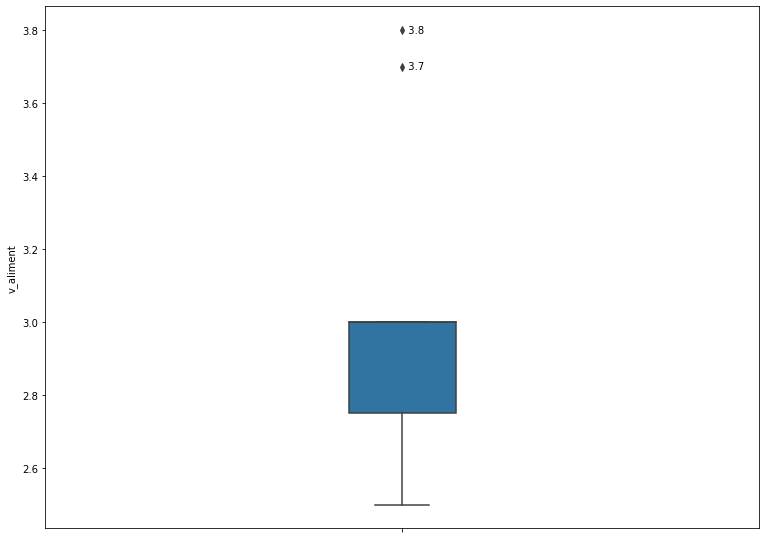

In [5]:
boxplotVa = sns.boxplot(y=dadosInput['v_aliment'], data=dadosInput['v_aliment'], width=0.15)

# Identificação de outliers

q3Va = dadosInput['v_aliment'].quantile(0.75)
q1Va = dadosInput['v_aliment'].quantile(0.25)

outSupVa = q3Va + (1.5*(q3Va - q1Va))
outInfVa = q1Va - (1.5*(q3Va - q1Va))

for item in dadosInput['v_aliment']:
    if item < outInfVa or item > outSupVa:
        plt.text(x=0, y=item, s=f'  {item}', ha='left', va='center')

plt.show()

<hr>
<h2>Dados para a simulação de Monte Carlo</h2>

In [6]:
iter = 1000000

relAmp = 0.1
relVa = 0.1
relVs = 0.1

dataMC = {
    'corrente': np.array([141.0, 135.0, 130.0, 129.0, 118.0, 112.5, 115.0, 151.0]),
    'v_soldagem': np.array([120.0, 122.1, 158.3, 149.5, 139.4, 135.0, 132.0, 110.0]),
    'v_aliment': np.array([3.0, 3.0, 3.0, 3.0, 2.7, 2.5, 2.7, 2.9])
}

dadosInputMC = pd.DataFrame(dataMC, columns=['corrente', 'v_soldagem', 'v_aliment'])
print(dadosInputMC)
print('\n')
estatBasicaMC = pd.DataFrame([[dadosInputMC['corrente'].mean(), dadosInputMC['corrente'].std(ddof=1)], [dadosInputMC['v_soldagem'].mean(), dadosInputMC['v_soldagem'].std(ddof=1)], [dadosInputMC['v_aliment'].mean(), dadosInputMC['v_aliment'].std(ddof=1)]], columns=['Média', 'Desvio-padrão'], index=['Corrente', 'Velocidade de Soldagem', 'Velocidade de Alimentação'])
print(estatBasicaMC)

mediaCMC = estatBasicaMC['Média']['Corrente']
mediaVsMC = estatBasicaMC['Média']['Velocidade de Soldagem']
mediaVaMC = estatBasicaMC['Média']['Velocidade de Alimentação']

   corrente  v_soldagem  v_aliment
0     141.0       120.0        3.0
1     135.0       122.1        3.0
2     130.0       158.3        3.0
3     129.0       149.5        3.0
4     118.0       139.4        2.7
5     112.5       135.0        2.5
6     115.0       132.0        2.7
7     151.0       110.0        2.9


                              Média  Desvio-padrão
Corrente                   128.9375      13.385593
Velocidade de Soldagem     133.2875      15.921453
Velocidade de Alimentação    2.8500       0.192725


<hr>
<h2>Incertezas-padrão e geração de valores das variáveis de entrada</h2>
<h3>Corrente</h3>

In [7]:
# Variabilidade das leituras
uMedC = estatBasicaMC['Desvio-padrão']['Corrente']/np.sqrt(len(dadosInputMC['corrente']))
valMedC = np.random.normal(estatBasicaMC['Média']['Corrente'], estatBasicaMC['Desvio-padrão']['Corrente'], iter)

# Resolução do micrômetro
uRelC = relAmp/(2*np.sqrt(3))
valRelC = np.random.uniform(-uRelC, uRelC, iter)

# Incerteza de calibração
uCalC = relAmp/2
valCalC = np.random.normal(0, uCalC, iter)

<h4>Modelo Matemático</h4>

In [8]:
C = valMedC + valRelC + valCalC

<h4>Desvio-padrão populacional e incerteza expandida</h4>

In [9]:
ucC = C.std(ddof=0)
UC = 2*ucC

<h4>Kurtosis e Skewness</h4>

In [10]:
kurtC = kurtosis(np.array(C))
skewnC = skew(np.array(C))

<h4>Resultados</h4>

O resultado de medição da corrente, com probabilidade de abrangência de 95.45 %, é 132.9 ± 26.7 A.

          Media  IncertezaCombinada  IncertezaExpandida  Kurtosis  Skewness
Corrente  132.9           13.364912           26.729823  0.004171  0.000806




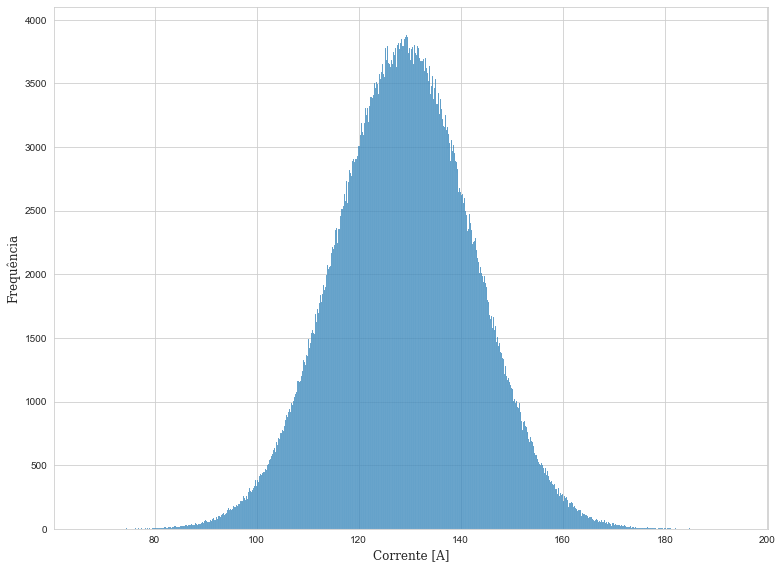

<Figure size 960x540 with 0 Axes>

In [11]:
print(f'O resultado de medição da corrente, com probabilidade de abrangência de 95.45 %, é {mediaC:.1f} \u00B1 {round(UC, 1):.1f} A.\n')

resultC = {
    'Media': mediaC,
    'IncertezaCombinada': ucC,
    'IncertezaExpandida': UC,
    'Kurtosis': kurtC,
    'Skewness': skewnC
}

resultDFC = pd.DataFrame(resultC, columns=['Media', 'IncertezaCombinada', 'IncertezaExpandida', 'Kurtosis', 'Skewness'], index=['Corrente'])
print(resultDFC)
print('\n')

font = {"family": "serif",
        "size": 12,
        }

sns.set_style("whitegrid")
sns.histplot(C, bins=int(np.sqrt(iter)))
plt.xlabel("Corrente [A]", fontdict=font)
plt.ylabel("Frequência", fontdict=font)

plt.figure(figsize=(1280/96, 720/96))
plt.show()

<hr>

<h3>Velocidade de Soldagem</h3>

In [12]:
# Variabilidade das leituras
uMedVs = estatBasicaMC['Desvio-padrão']['Velocidade de Soldagem']/np.sqrt(len(dadosInputMC['v_soldagem']))
valMedVs = np.random.normal(estatBasicaMC['Média']['Velocidade de Soldagem'], estatBasicaMC['Desvio-padrão']['Velocidade de Soldagem'], iter)

# Resolução do micrômetro
uRelVs = relVs/(2*np.sqrt(3))
valRelVs = np.random.uniform(-uRelVs, uRelVs, iter)

# Incerteza de calibração
uCalVs = relVs/2
valCalVs = np.random.normal(0, uCalVs, iter)

<h4>Modelo Matemático</h4>

In [13]:
Vs = valMedVs + valRelVs + valCalVs

<h4>Desvio-padrão e incerteza expandida</h4>

In [14]:
ucVs = Vs.std(ddof=0)
UVs = 2*ucVs

<h4>Kurtosis e Skewness</h4>

In [15]:
kurtVs = kurtosis(np.array(Vs))
skewnVs = skew(np.array(Vs))

<h4>Resultados</h4>

O resultado de medição da velocidade de soldagem, com probabilidade de abrangência de 95.45 %, é 137.1 ± 31.9 mm/min.

           Media  IncertezaCombinada  IncertezaExpandida  Kurtosis  Skewness
Corrente  137.13           15.944687           31.889374  0.010394  0.000643




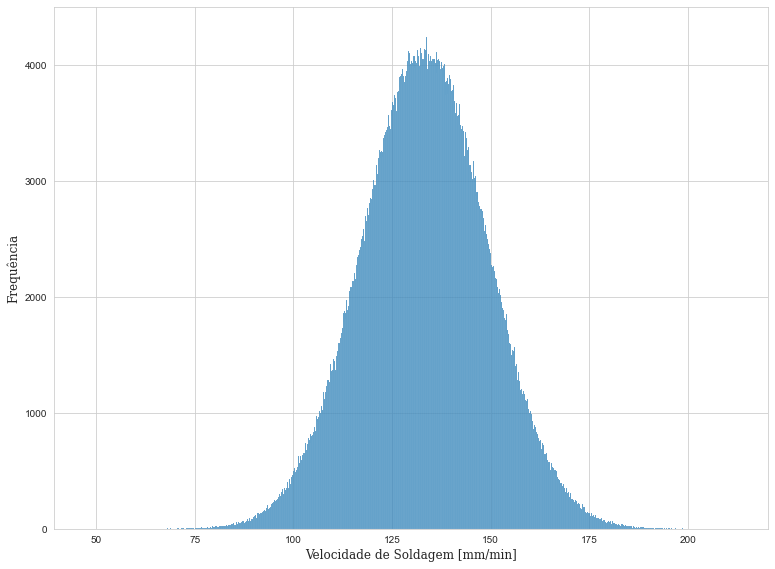

<Figure size 960x540 with 0 Axes>

In [16]:
print(f'O resultado de medição da velocidade de soldagem, com probabilidade de abrangência de 95.45 %, é {mediaVs:.1f} \u00B1 {round(UVs, 1):.1f} mm/min.\n')

resultVs = {
    'Media': mediaVs,
    'IncertezaCombinada': ucVs,
    'IncertezaExpandida': UVs,
    'Kurtosis': kurtVs,
    'Skewness': skewnVs
}

resultDFVs = pd.DataFrame(resultVs, columns=['Media', 'IncertezaCombinada', 'IncertezaExpandida', 'Kurtosis', 'Skewness'], index=['Corrente'])
print(resultDFVs)
print('\n')

font = {"family": "serif",
        "size": 12,
        }

sns.set_style("whitegrid")
sns.histplot(Vs, bins=int(np.sqrt(iter)))
plt.xlabel("Velocidade de Soldagem [mm/min]", fontdict=font)
plt.ylabel("Frequência", fontdict=font)

plt.figure(figsize=(1280/96, 720/96))
plt.show()

<hr>

<h3>Velocidade de Alimentação</h3>

In [17]:
# Variabilidade das leituras
uMedVa = estatBasicaMC['Desvio-padrão']['Velocidade de Alimentação']/np.sqrt(len(dadosInputMC['v_aliment']))
valMedVa = np.random.normal(estatBasicaMC['Média']['Velocidade de Alimentação'], estatBasicaMC['Desvio-padrão']['Velocidade de Alimentação'], iter)

# Resolução do micrômetro
uRelVa = relVa/(2*np.sqrt(3))
valRelVa = np.random.uniform(-uRelVa, uRelVa, iter)

# Incerteza de calibração
uCalVa = relVa/2
valCalVa = np.random.normal(0, uCalVa, iter)

<h4>Modelo Matemático</h4>

In [18]:
Va = valMedVa + valRelVa + valCalVa

<h4>Desvio-padrão e incerteza expandida</h4>

In [19]:
ucVa = Va.std(ddof=0)
UVa = 2*ucVa

<h4>Kurtosis e Skewness</h4>

In [20]:
kurtVa = kurtosis(np.array(Va))
skewnVa = skew(np.array(Va))

<h4>Resultados</h4>

O resultado de medição da velocidade de alimentação, com probabilidade de abrangência de 95.45 %, é 3.0 ± 0.4 m/min.

          Media  IncertezaCombinada  IncertezaExpandida  Kurtosis  Skewness
Corrente   3.03              0.1996              0.3992  0.006025 -0.001379




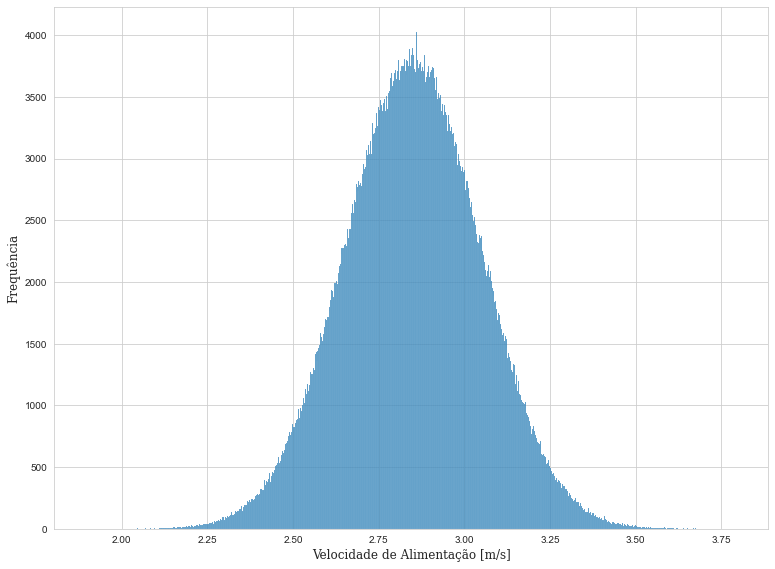

<Figure size 960x540 with 0 Axes>

In [22]:
print(f'O resultado de medição da velocidade de alimentação, com probabilidade de abrangência de 95.45 %, é {mediaVa:.1f} \u00B1 {round(UVa, 1):.1f} m/min.\n')

resultVa = {
    'Media': mediaVa,
    'IncertezaCombinada': ucVa,
    'IncertezaExpandida': UVa,
    'Kurtosis': kurtVa,
    'Skewness': skewnVa
}

resultDFVa = pd.DataFrame(resultVa, columns=['Media', 'IncertezaCombinada', 'IncertezaExpandida', 'Kurtosis', 'Skewness'], index=['Corrente'])
print(resultDFVa)
print('\n')

font = {"family": "serif",
        "size": 12,
        }

sns.set_style("whitegrid")
sns.histplot(Va, bins=int(np.sqrt(iter)))
plt.xlabel("Velocidade de Alimentação [m/s]", fontdict=font)
plt.ylabel("Frequência", fontdict=font)

plt.figure(figsize=(1280/96, 720/96))
plt.show()